<a href="https://colab.research.google.com/github/Alexandre77777/computer_math/blob/main/9.%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F%20%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2%20%D0%B8%20%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%A4%D1%83%D1%80%D1%8C%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969_%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2_%D0%B8_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%A4%D1%83%D1%80%D1%8C%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №9. Генерация сигналов и преобразования Фурье

# Блок №1. Базовый уровень

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import spectrogram

## **Задание 1: Генерация сигналов**



В этом задании вам нужно создать различные виды сигналов. Сигналы являются основой цифровой обработки сигналов, и умение их генерировать является важным навыком.













1. **Синусоидальный сигнал**: Синусоидальный сигнал можно представить как $A \sin(2\pi ft + \phi)$, где $A$ - амплитуда, $f$ - частота, $\phi$ - фаза.

- Создайте функцию, которая принимает эти параметры, а также длительность сигнала, и возвращает сгенерированный сигнал.

### Пример:



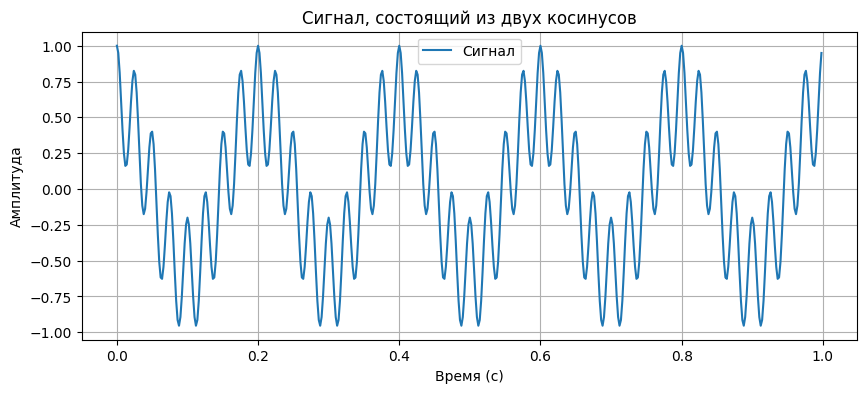

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

T = 1.0
fs = 500.0
t = np.arange(0, T, 1/fs)

f1 = 5.0
f2 = 40.0
a1 = 0.6
a2 = 0.4
signal = a1*np.cos(2*np.pi*f1*t) + a2*np.cos(2*np.pi*f2*t)

plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал, состоящий из двух косинусов')
plt.legend()
plt.grid(True)
plt.show()


### Ваш код:

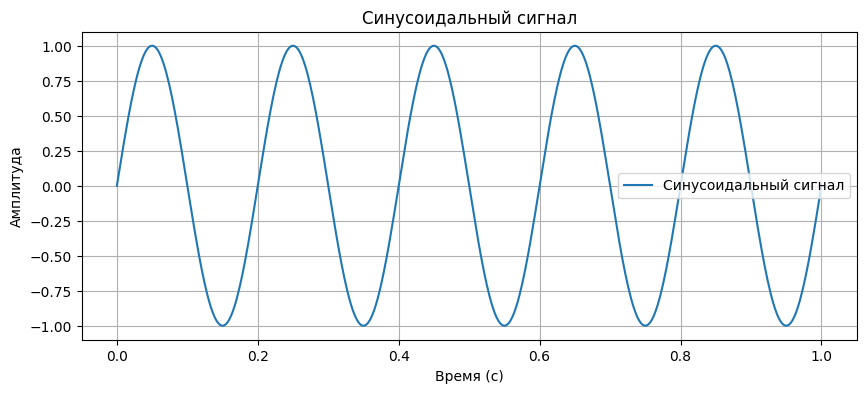

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(amplitude, frequency, phase, duration, sampling_rate=500):
    t = np.linspace(0, duration, int(sampling_rate * duration))
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return t, signal

amplitude = 1
frequency = 5
phase = 0
duration = 1

t, sine_signal = generate_sine_wave(amplitude, frequency, phase, duration)

plt.figure(figsize=(10, 4))
plt.plot(t, sine_signal, label="Синусоидальный сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Синусоидальный сигнал")
plt.legend()
plt.grid(True)
plt.show()

2. **Сумма синусоид**: Сигнал, состоящий из суммы двух синусоид, можно представить как $A_1 \sin(2\pi f_1t + \phi_1) + A_2 \sin(2\pi f_2t + \phi_2)$.

- Создайте функцию, которая принимает параметры для двух синусоид, а также длительность сигнала, и возвращает сгенерированный сигнал.

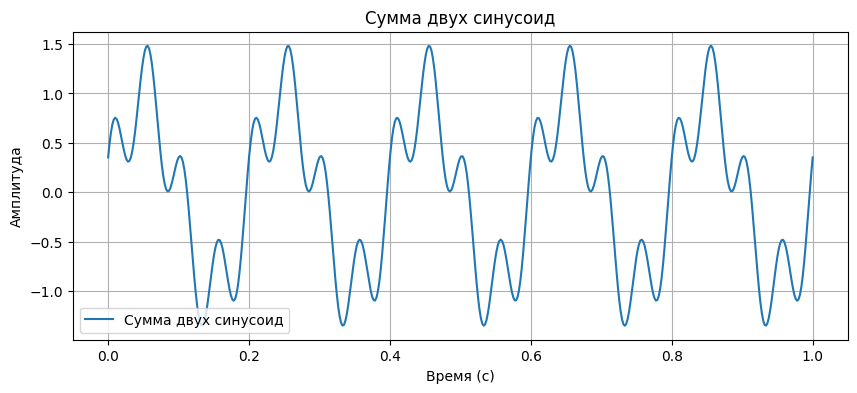

In [22]:
def generate_sum_of_sines(a1, f1, p1, a2, f2, p2, duration, sampling_rate=500):
    t = np.linspace(0, duration, int(sampling_rate * duration))
    signal = a1 * np.sin(2 * np.pi * f1 * t + p1) + \
             a2 * np.sin(2 * np.pi * f2 * t + p2)
    return t, signal

a1, f1, p1 = 1, 5, 0
a2, f2, p2 = 0.5, 20, np.pi / 4
duration = 1

t, sum_signal = generate_sum_of_sines(a1, f1, p1, a2, f2, p2, duration)

plt.figure(figsize=(10, 4))
plt.plot(t, sum_signal, label="Сумма двух синусоид")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Сумма двух синусоид")
plt.legend()
plt.grid(True)
plt.show()

3. **Шумовой сигнал**: Шумовой сигнал (или белый шум) можно сгенерировать как случайные значения из нормального распределения.

- Создайте функцию, которая принимает амплитуду шума и длительность сигнала, и возвращает сгенерированный шумовой сигнал.

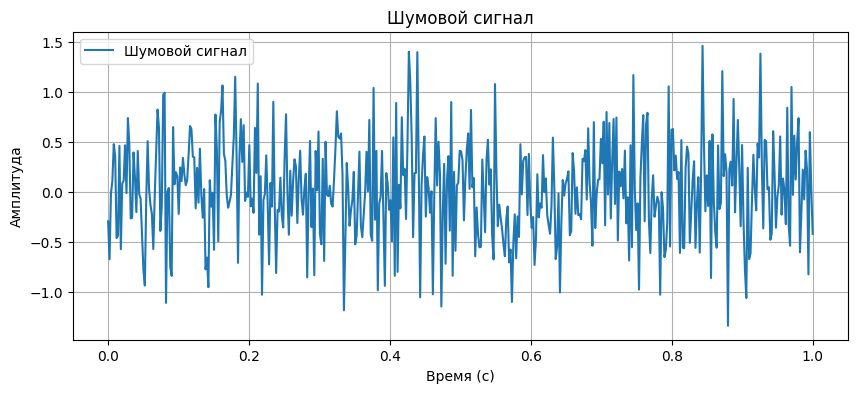

In [23]:
def generate_noise(amplitude, duration, sampling_rate=500):
    t = np.linspace(0, duration, int(sampling_rate * duration))
    noise = amplitude * np.random.normal(size=len(t))
    return t, noise

amplitude = 0.5
duration = 1

t, noise_signal = generate_noise(amplitude, duration)

plt.figure(figsize=(10, 4))
plt.plot(t, noise_signal, label="Шумовой сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Шумовой сигнал")
plt.legend()
plt.grid(True)
plt.show()

4. **Синусоида плюс шум**: Сигнал, который представляет собой сумму синусоиды и шума, можно сгенерировать путем сложения синусоидального и шумового сигналов.
- Создайте функцию, которая принимает параметры для синусоиды и шума, а также длительность сигнала, и возвращает сгенерированный сигнал.

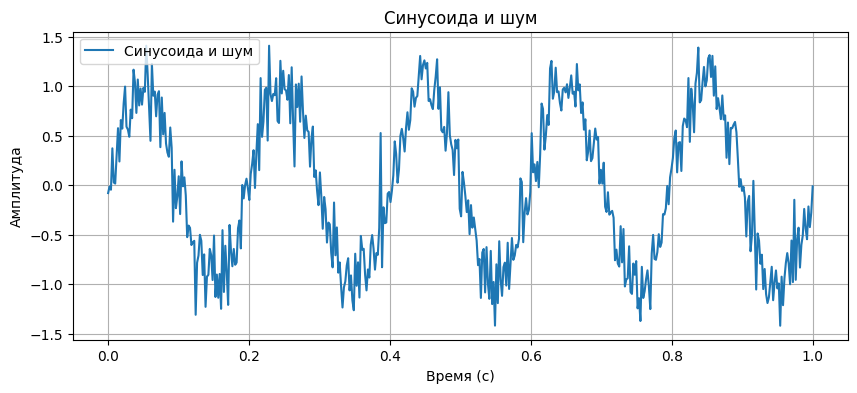

In [24]:
def generate_sine_with_noise(a1, f1, p1, noise_amplitude, duration, sampling_rate=500):
    t = np.linspace(0, duration, int(sampling_rate * duration))
    sine = a1 * np.sin(2 * np.pi * f1 * t + p1)
    noise = noise_amplitude * np.random.normal(size=len(t))
    signal = sine + noise
    return t, signal

a1, f1, p1 = 1, 5, 0
noise_amplitude = 0.2
duration = 1

t, noisy_signal = generate_sine_with_noise(a1, f1, p1, noise_amplitude, duration)

plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label="Синусоида и шум")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Синусоида и шум")
plt.legend()
plt.grid(True)
plt.show()

## **Задание 2: Преобразование Фурье**


Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Это основной инструмент для анализа сигналов. Создайте функцию, которая принимает сигнал и возвращает его преобразование Фурье.


1. Примените преобразование Фурье к синусоидальному сигналу и визуализируйте результат.


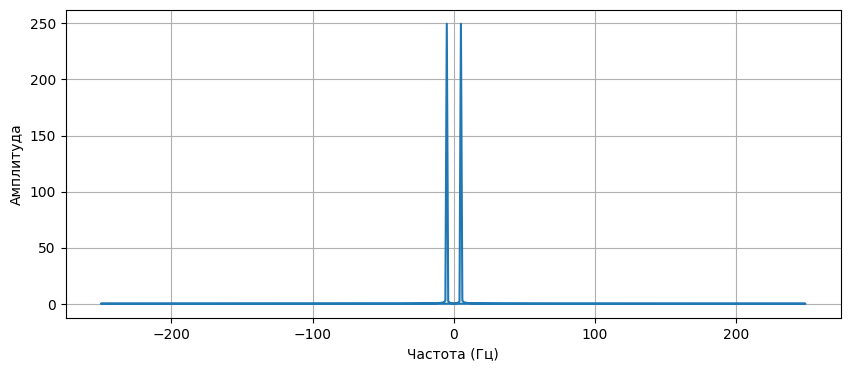

In [27]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def compute_fft(signal, sampling_rate):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)
    return xf, np.abs(yf)

amplitude = 1
frequency = 5
phase = 0
duration = 1
sampling_rate = 500

t, sine_signal = generate_sine_wave(amplitude, frequency, phase, duration, sampling_rate)

xf, yf = compute_fft(sine_signal, sampling_rate)

plt.figure(figsize=(10, 4))
plt.plot(xf, yf)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()


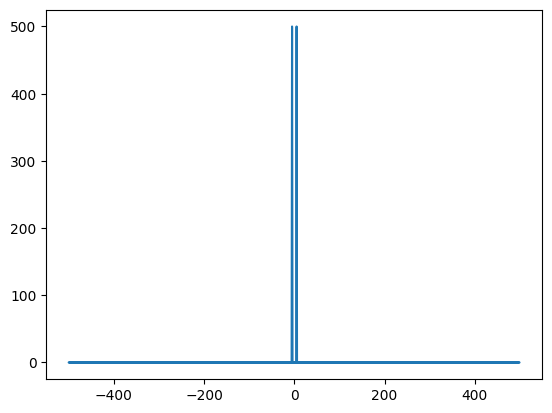

In [ ]:
# Пример

2. Примените преобразование Фурье к сигналу, состоящему из суммы двух синусоид, и визуализируйте результат.


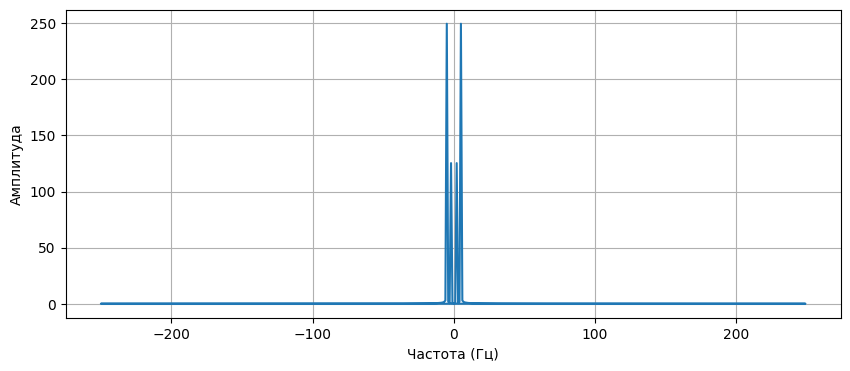

In [29]:
a1, f1, p1 = 1, 5, 0
a2, f2, p2 = 0.5, 2, np.pi / 4
duration = 1
sampling_rate = 500
t, sum_signal = generate_sum_of_sines(a1, f1, p1, a2, f2, p2, duration, sampling_rate)
xf, yf = compute_fft(sum_signal, sampling_rate)

plt.figure(figsize=(10, 4))
plt.plot(xf, yf)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()


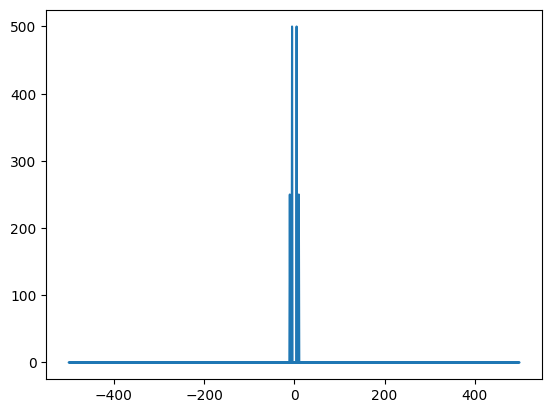

In [ ]:
# Пример

3. Примените преобразование Фурье к шумовому сигналу и визуализируйте результат.


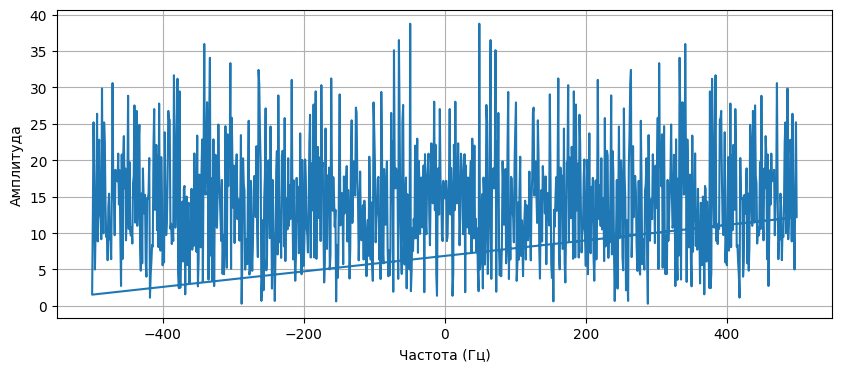

In [30]:
amplitude = 0.5
duration = 1
sampling_rate = 1000
t, noise_signal = generate_noise(amplitude, duration, sampling_rate)
xf, yf = compute_fft(noise_signal, sampling_rate)

plt.figure(figsize=(10, 4))
plt.plot(xf, yf)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()


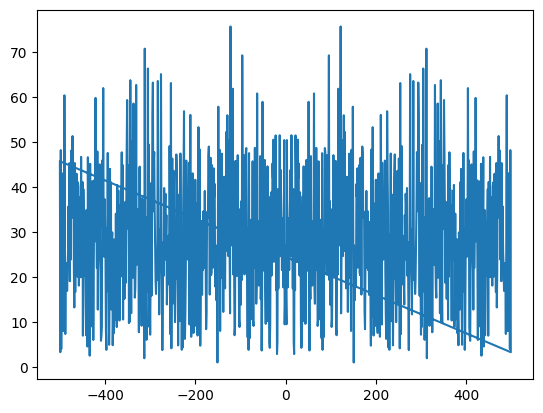

In [ ]:
# Пример

4. Примените преобразование Фурье к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результат.

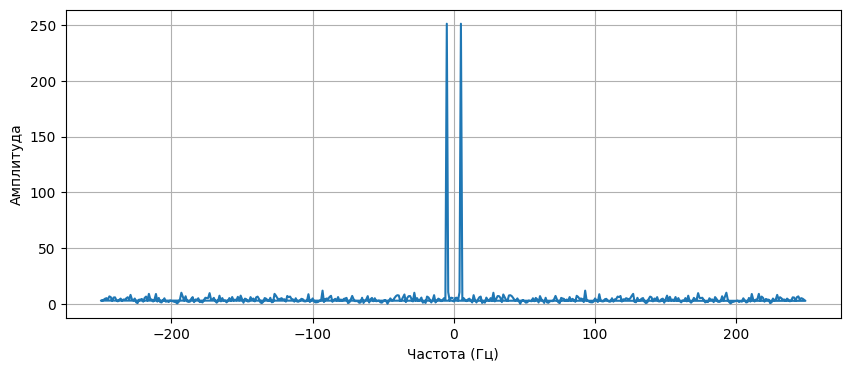

In [31]:
a1, f1, p1 = 1, 5, 0
noise_amplitude = 0.2
duration = 1
sampling_rate = 500
t, noisy_signal = generate_sine_with_noise(a1, f1, p1, noise_amplitude, duration, sampling_rate)
xf, yf = compute_fft(noisy_signal, sampling_rate)

# Визуализация
plt.figure(figsize=(10, 4))
plt.plot(xf, yf)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()


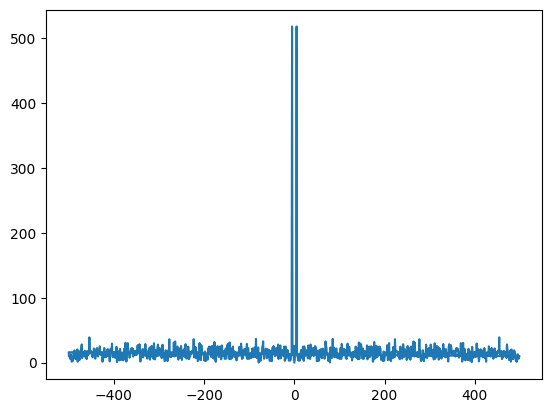

In [ ]:
# Пример

## **Задание 3: Фильтрация сигналов**

Фильтрация сигналов позволяет улучшить качество сигнала, убрав нежелательные частоты. Создайте функцию, которая принимает сигнал и частоту среза, и возвращает отфильтрованный сигнал.




1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import firwin, convolve

def filter_signal(signal, cutoff_freq, fs):
    nyquist_freq = 0.5 * fs
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    num_taps = 512
    filter_taps = firwin(num_taps, normalized_cutoff_freq)
    filtered_signal = convolve(signal, filter_taps, mode='same')
    return filtered_signal


In [ ]:
# Пример

2. Примените эту функцию к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результаты до и после фильтрации.

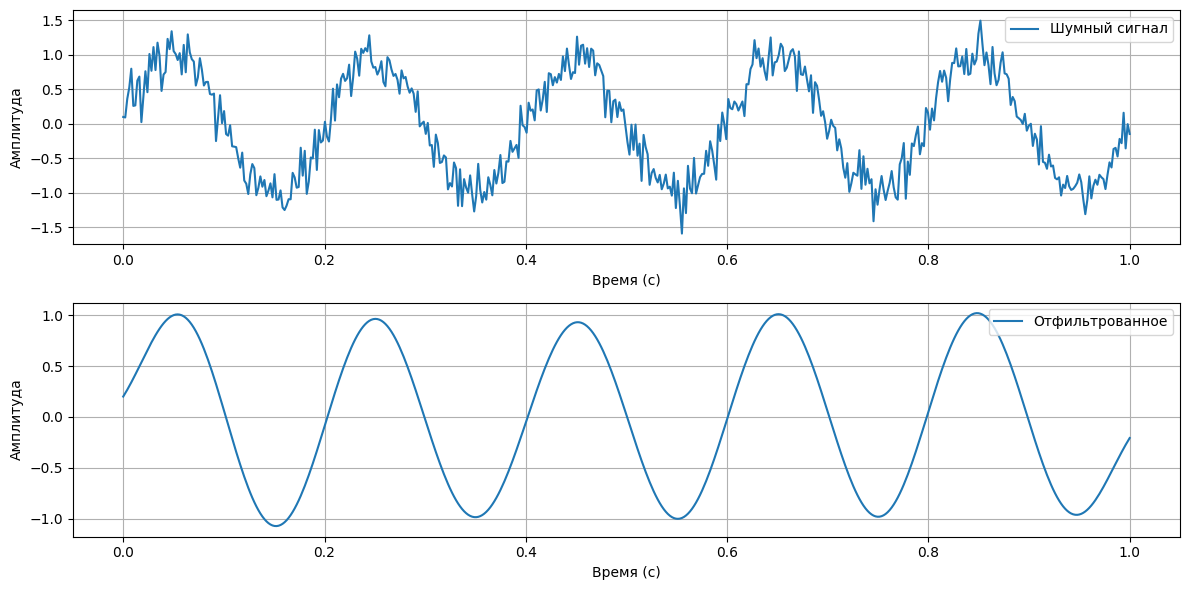

In [34]:
a1, f1, p1 = 1, 5, 0
noise_amplitude = 0.2
duration = 1
sampling_rate = 500

t, noisy_signal = generate_sine_with_noise(a1, f1, p1, noise_amplitude, duration, sampling_rate)

cutoff_frequency = 10
filtered_signal = filter_signal(noisy_signal, cutoff_frequency, sampling_rate)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, label='Шумный сигнал')
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Отфильтрованное')
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## **Задание 4: Анализ сигналов**

Анализ сигналов включает в себя различные методы и техники для изучения и понимания сигналов. Создайте функцию, которая принимает сигнал и возвращает его спектрограмму (**scipy.signal.spectrogram**).


**Спектрограмма** - это визуальное представление спектра частот сигнала во времени. Она показывает, какие частоты присутствуют в сигнале в каждый момент времени. Вот как правильно понимать спектрограмму:

- **Ось X**: Это время. Она показывает продолжительность сигнала. Каждый столбец на спектрограмме представляет собой отдельный момент времени.

- **Ось Y**: Это частота. Она показывает различные частоты, которые присутствуют в сигнале. Каждая строка на спектрограмме представляет собой отдельную частоту.

- **Значение**: Значение в каждой точке (x, y) показывает амплитуду (или интенсивность) данной частоты в данное время. Обычно более яркие цвета означают большую амплитуду, а более темные цвета - меньшую амплитуду.

Таким образом, спектрограмма позволяет вам видеть, как меняется спектральный состав сигнала во времени. Это может быть полезно во многих областях, включая анализ речи, музыку, радиосигналы и многое другое. Например, в анализе речи вы можете видеть, как меняются форманты (основные частоты) во время произношения различных звуков. В музыке вы можете видеть, как меняются ноты во время проигрывания песни.

1. Создайте функцию для вычисления и визуализации спектрограммы сигнала.


In [36]:
def spectr(signal, sampling_rate):
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=300, noverlap=150)
    Sxx = 10 * np.log10(Sxx)
    return f, t, Sxx


2. Примените эту функцию к различным сигналам, которые вы сгенерировали и проанализировали в предыдущих заданиях.

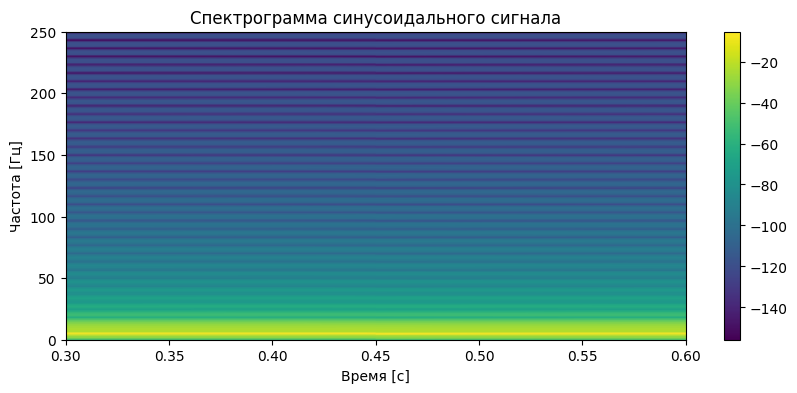

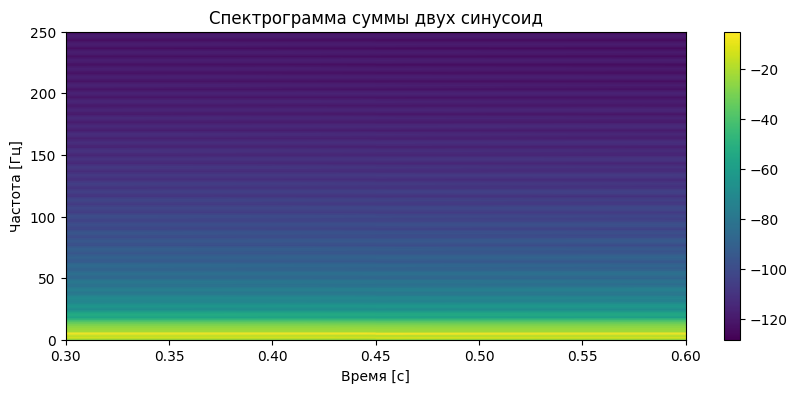

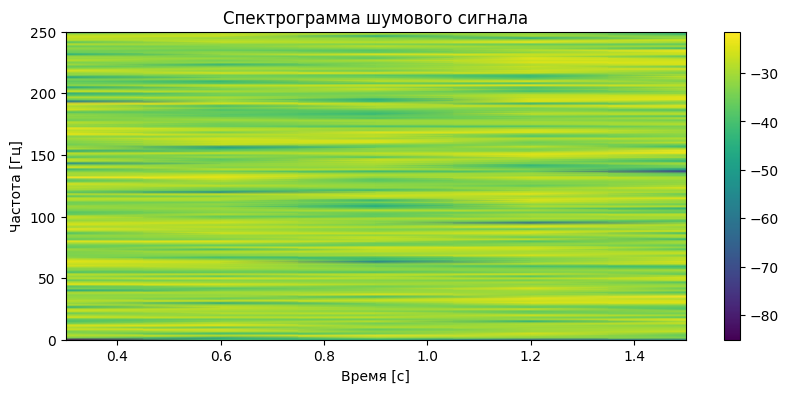

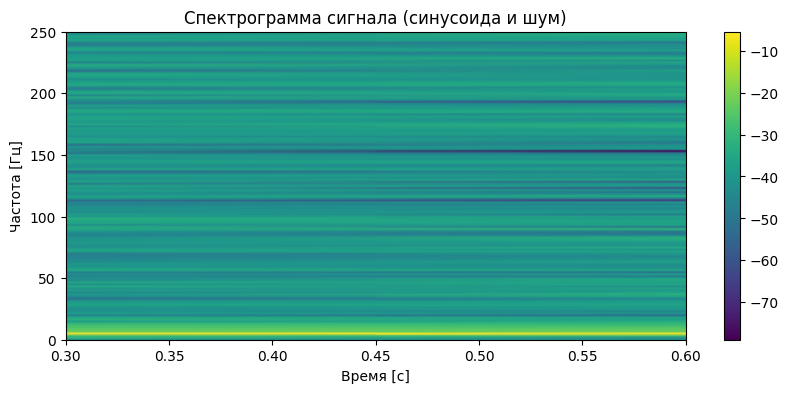

In [37]:
f, t, Sxx_sine = spectr(sine_signal, sampling_rate)
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, Sxx_sine, shading='gouraud')
plt.title('Спектрограмма синусоидального сигнала')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.colorbar()
plt.show()

f, t, Sxx_sum = spectr(sum_signal, sampling_rate)
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, Sxx_sum, shading='gouraud')
plt.title('Спектрограмма суммы двух синусоид')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.colorbar()
plt.show()

f, t, Sxx_noise = spectr(noise_signal, sampling_rate)
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, Sxx_noise, shading='gouraud')
plt.title('Спектрограмма шумового сигнала')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.colorbar()
plt.show()

f, t, Sxx_noisy = spectr(noisy_signal, sampling_rate)
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, Sxx_noisy, shading='gouraud')
plt.title('Спектрограмма сигнала (синусоида и шум)')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.colorbar()
plt.show()


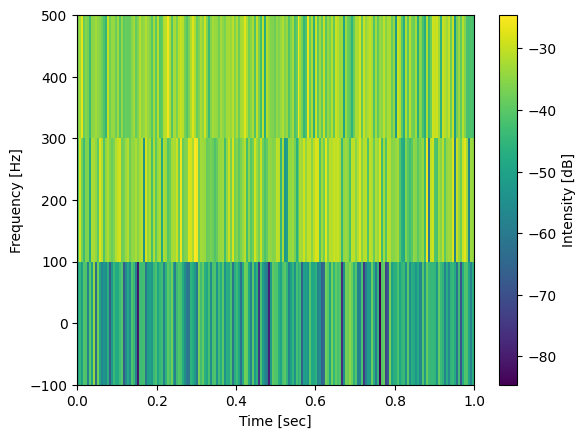

In [ ]:
# Пример

# Блок №2. Повышенный уровень

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io import wavfile

## **Задание 1: Чтение и визуализация звукового файла**











В этом задании вам нужно использовать функцию `wavfile.read` из модуля `scipy.io` для чтения звукового файла. Эта функция возвращает частоту дискретизации и данные аудиосигнала. Затем вы должны визуализировать эти данные с помощью `matplotlib.pyplot.plot`. В результате вы получите график амплитуды звукового сигнала во времени.

1. Используйте библиотеку `scipy.io.wavfile` для чтения звукового файла.

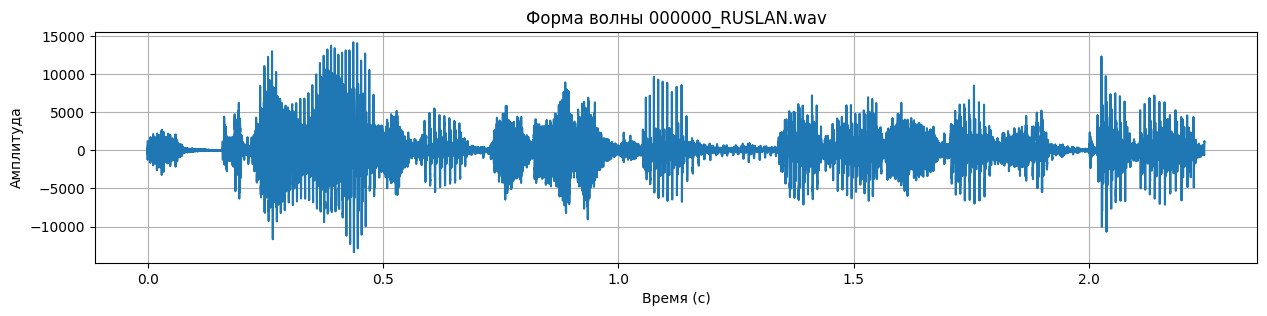

In [ ]:
from scipy.io import wavfile


file_path = "000000_RUSLAN.wav"
sampling_rate, audio_data = wavfile.read(file_path)

# Визуализация
time = np.arange(len(audio_data)) / sampling_rate
plt.figure(figsize=(15, 3))
plt.plot(time, audio_data)
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title(f"Форма волны {file_path}")
plt.grid(True)
plt.show()


2. Визуализируйте временную форму звукового сигнала.

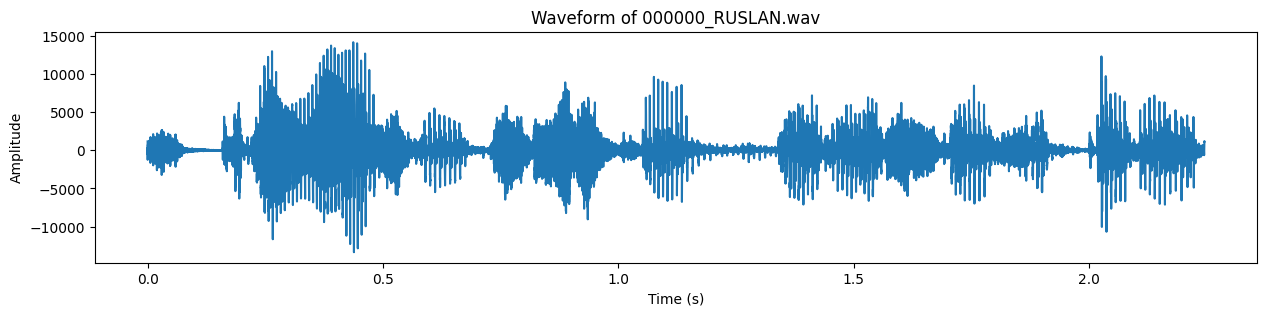

In [ ]:
time = np.arange(len(audio_data)) / sampling_rate

plt.figure(figsize=(15, 3))
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Waveform of {file_path}')

plt.show()


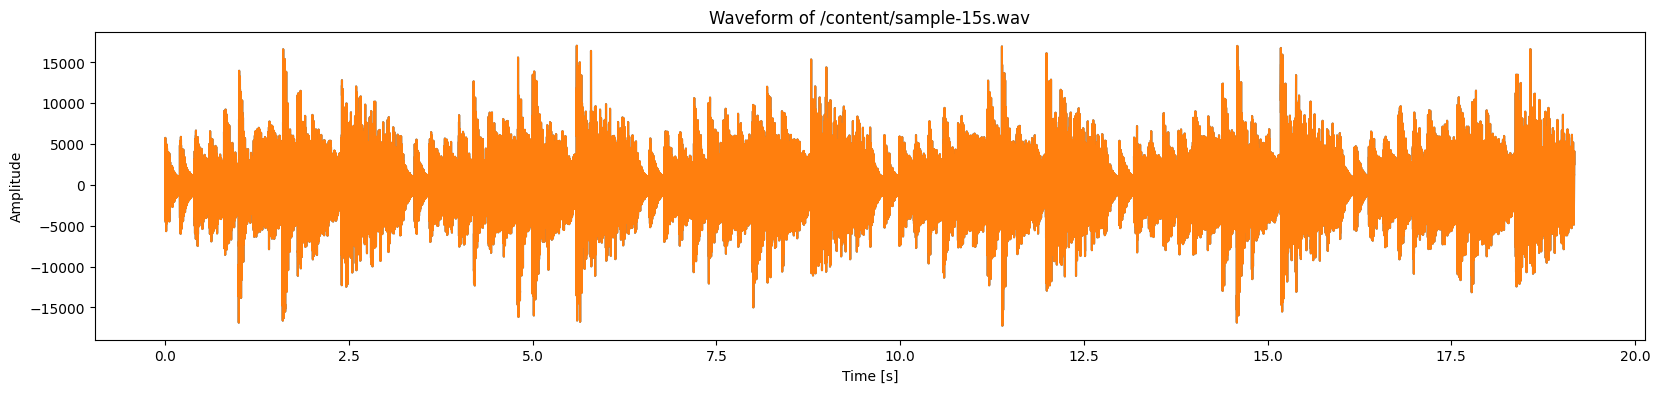

In [ ]:
# Пример

## **Задание 2: Применение преобразования Фурье**



Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Для его применения вы можете использовать функцию `fft` из модуля `scipy.fft`. Эта функция возвращает комплексные коэффициенты преобразования Фурье, которые затем можно визуализировать.

1. Примените преобразование Фурье к звуковому сигналу и визуализируйте спектр.

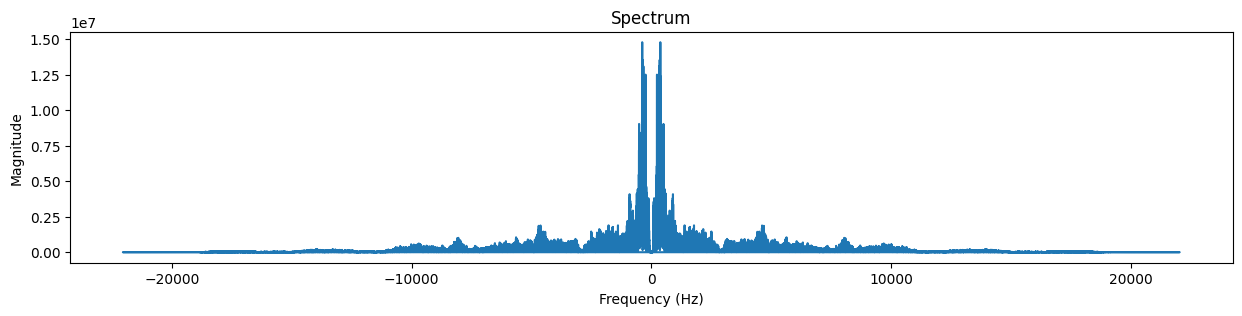

In [ ]:
fft_result = fft(audio_data)
frequencies = fftfreq(len(audio_data), 1 / sampling_rate)

plt.figure(figsize=(15, 3))
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.show()


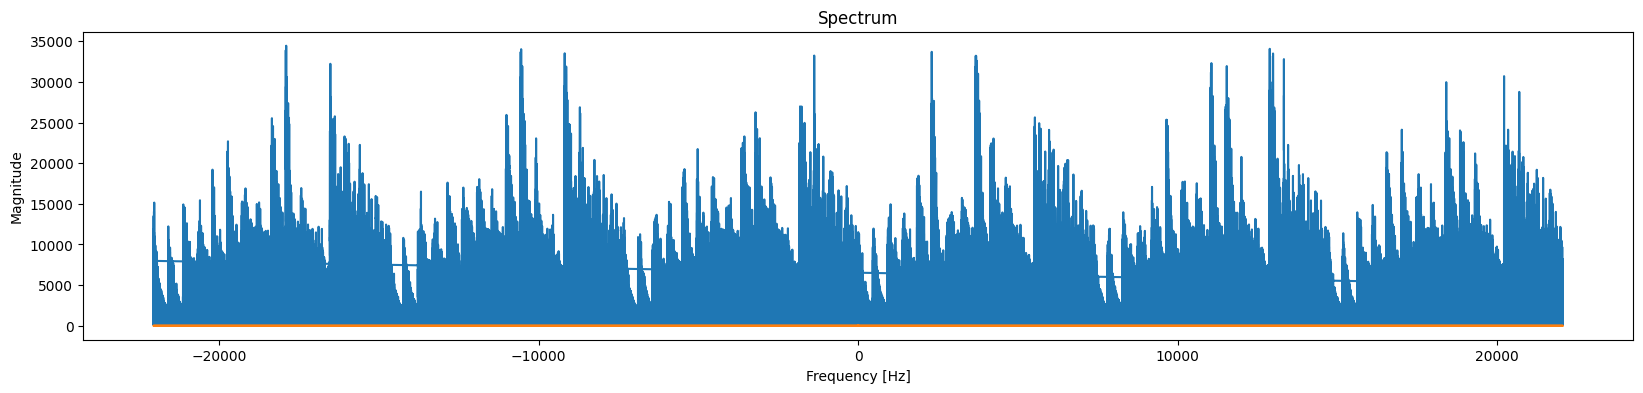

In [ ]:
# Пример

## **Задание 3: Фильтрация сигнала**



Фильтрация сигнала позволяет улучшить качество звука, убрав нежелательные частоты. Для этого вы можете использовать преобразование Фурье, затем обнулить некоторые из его коэффициентов и выполнить обратное преобразование Фурье с помощью функции `ifft` из модуля `scipy.fft`.

1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.


In [ ]:
def filter_signal_fft(signal, low_cutoff, high_cutoff, fs):
    # Perform FFT
    frequencies = fftfreq(len(signal), 1 / fs)
    fft_values = fft(signal)

    # Find indices corresponding to cutoff frequencies
    low_index = np.argmin(np.abs(frequencies - low_cutoff))
    high_index = np.argmin(np.abs(frequencies - high_cutoff))

    # Zero out FFT coefficients outside the desired frequency range
    filtered_fft = np.copy(fft_values)
    filtered_fft[:low_index] = 0
    filtered_fft[high_index:] = 0

    # Perform inverse FFT to obtain the filtered signal
    filtered_signal = ifft(filtered_fft).real

    return filtered_signal


2. Примените эту функцию к звуковому сигналу и визуализируйте результаты до и после фильтрации.

Text(0.5, 1.0, 'Waveform of filtetred 000000_RUSLAN.wav')

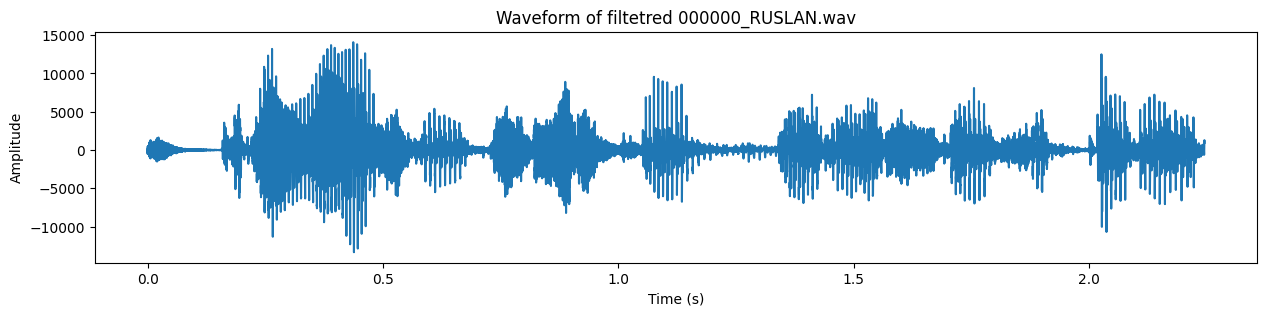

In [ ]:
filtered_audio_data = filter_signal(audio_data, 150, 1000)
plt.figure(figsize=(15, 3))
plt.plot(time, filtered_audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Waveform of filtetred {file_path}')


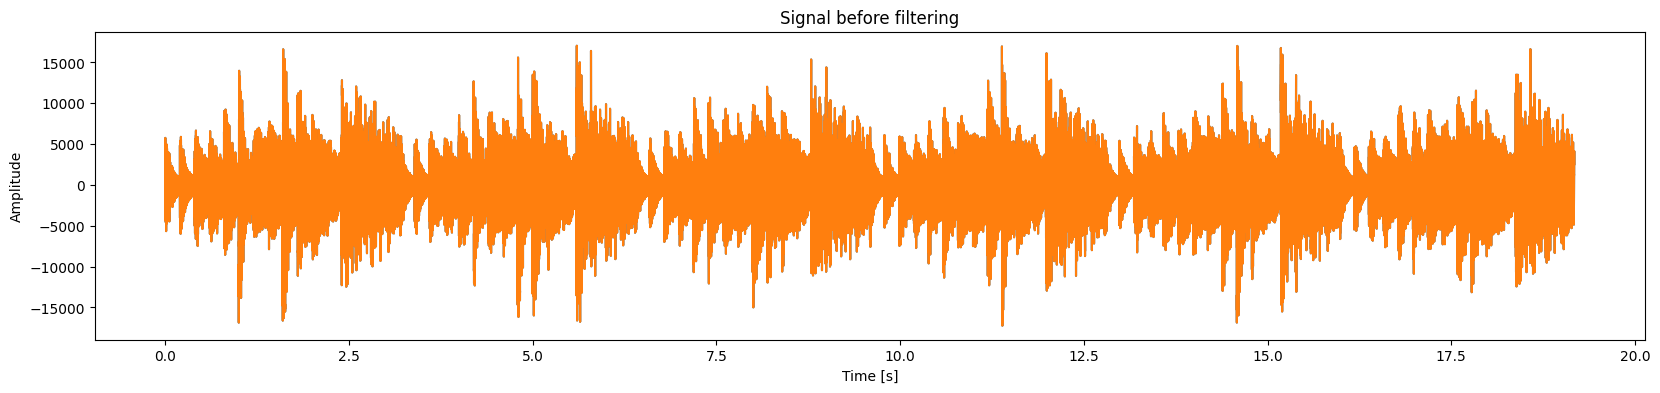

In [ ]:
# Визуализация сигнала до фильтрации

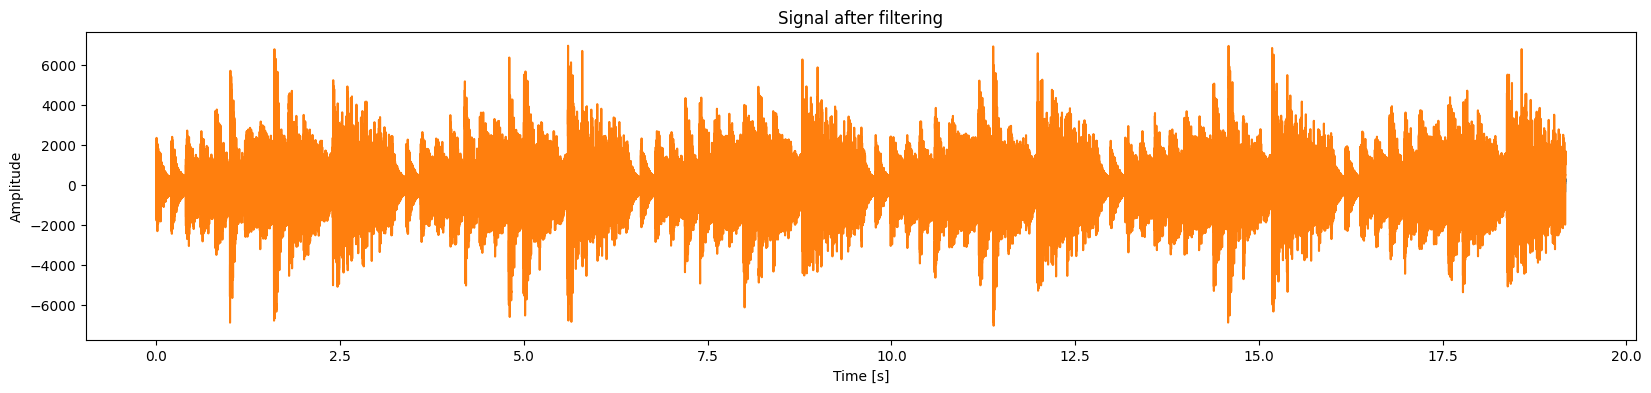

In [ ]:
# Визуализация сигнала после фильтрации

## **Задание 4: Обратное преобразование Фурье**



После фильтрации сигнала вы можете применить обратное преобразование Фурье для получения отфильтрованного звукового сигнала во временной области. Затем вы можете сохранить этот сигнал в новый звуковой файл с помощью функции `wavfile.write` из модуля `scipy.io`.

1. Примените обратное преобразование Фурье к отфильтрованному сигналу.


In [ ]:
# Применение обратного преобразования Фурье
reversed_signal = ifft(filtered_audio_data)
reversed_signal = reversed_signal.real.astype(np.int16)

2. Сохраните полученный сигнал в новый звуковой файл.

In [ ]:
# Сохранение отфильтрованного сигнала
wavfile.write("filtered_audio.wav", sampling_rate, reversed_signal)